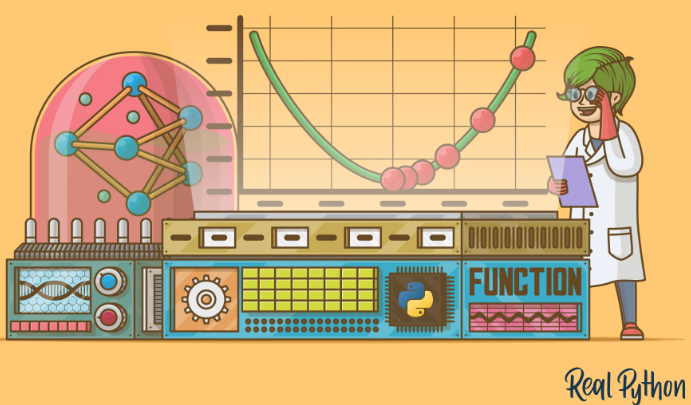

In [1]:
#Gradient Descent Algorithem


#Cost meaning the minimizes the sum of the squared residuals to get the best line of it.
#The cost or loss function is the function that minimizes the sum of the squared residuals in regression analysis.
#To get to the minimum, take the partial derivative with respect to the Beta or weight, and the intercept term or bias, and set it equal to 0 (minimizes)
#these two parameters yield the optimal slope/gradient and y-intercept/bias to create the line of best fit to be used for application
# It is used to measure the difference between the predicted values and the actual values in a regression model.

def gradient_descent(x, y,
                     iterations = 1000, learning_rate = 0.0001, tolerance = 1e-4,
                     current_weight = 0.1, current_bias = 0.01):
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
    
    for i in range(iterations):
        
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
        
        if previous_cost and abs(previous_cost-current_cost) < tolerance:
            break
        
        previous_cost = current_cost
        
        costs.append(current_cost)
        weights.append(current_weight)
        
        #deriviative of the loss function which is referred to above
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        
        #check the lesson or notes for the formula of the gradient descent algo formula
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
    print(f"Iteration {i+1}: Cost {current_cost}")

    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
        
    return current_weight, current_bias

In [2]:
import pandas as pd
x = pd.Series(data=[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])

y = pd.Series(data=[31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])


Iteration 1: Cost 4352.088931274409


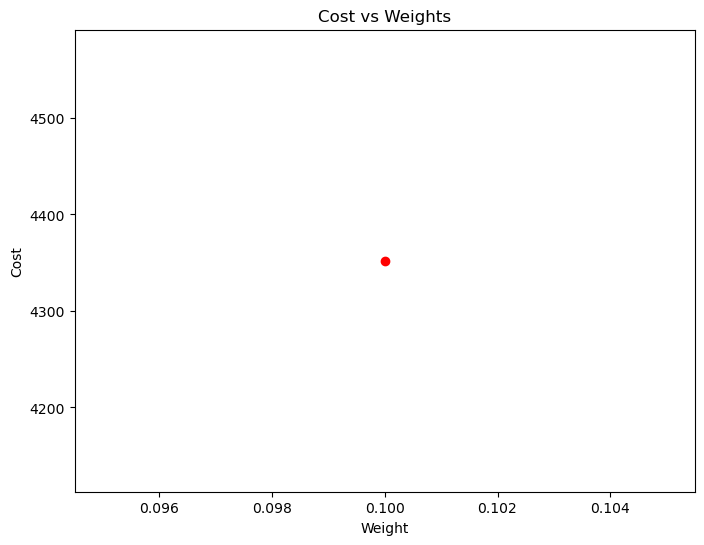

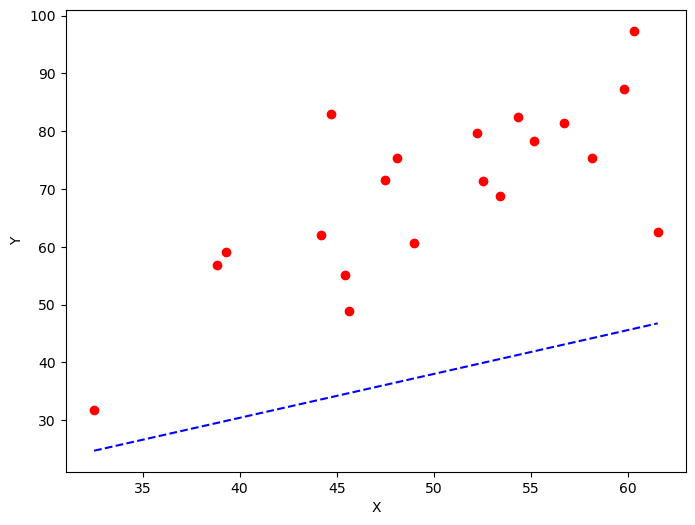

Iteration 2: Cost 1114.8561474350017


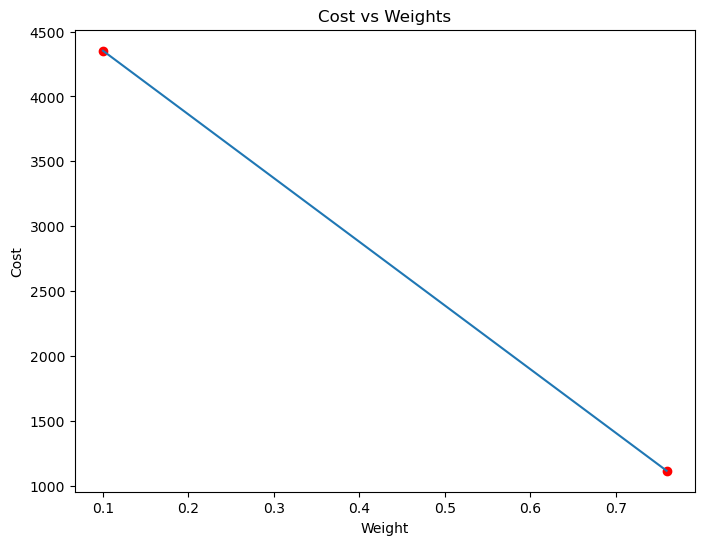

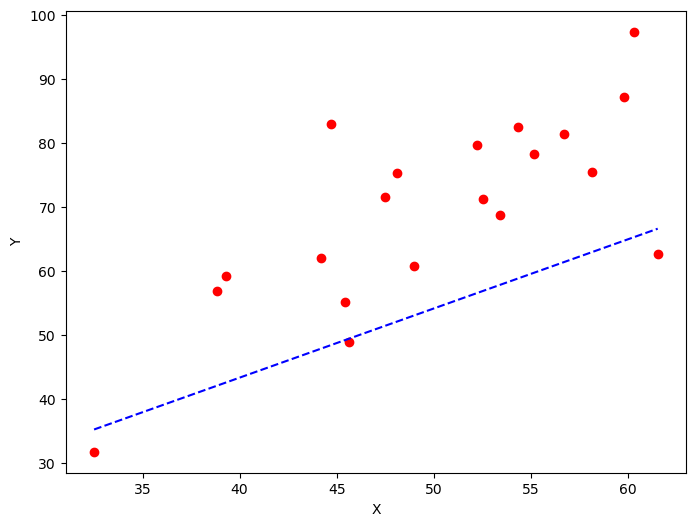

Iteration 3: Cost 341.42912086804455


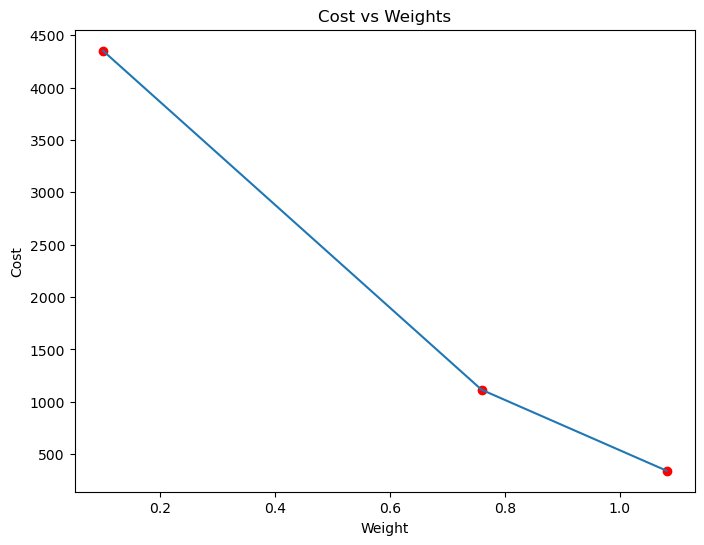

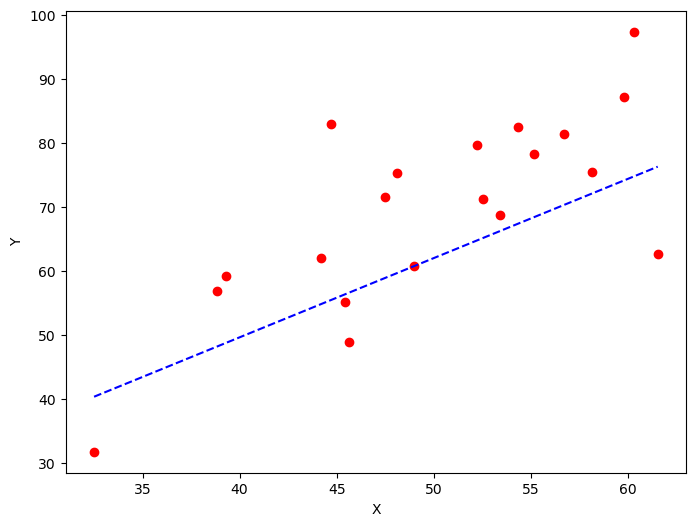

Iteration 4: Cost 156.64495290904443


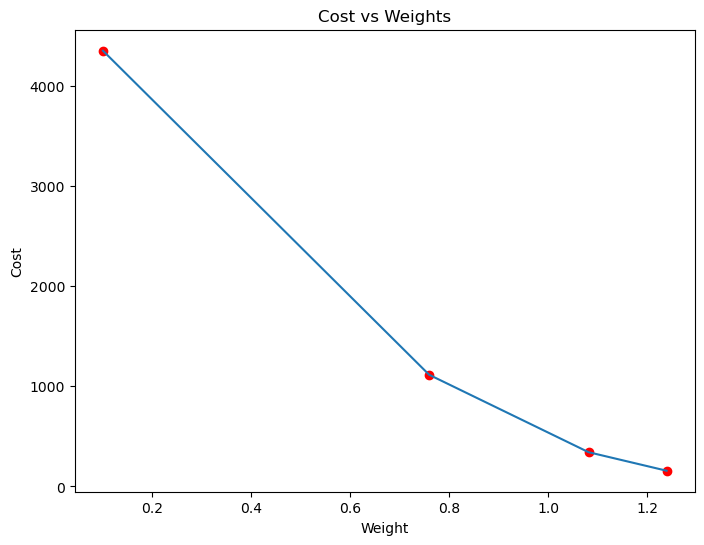

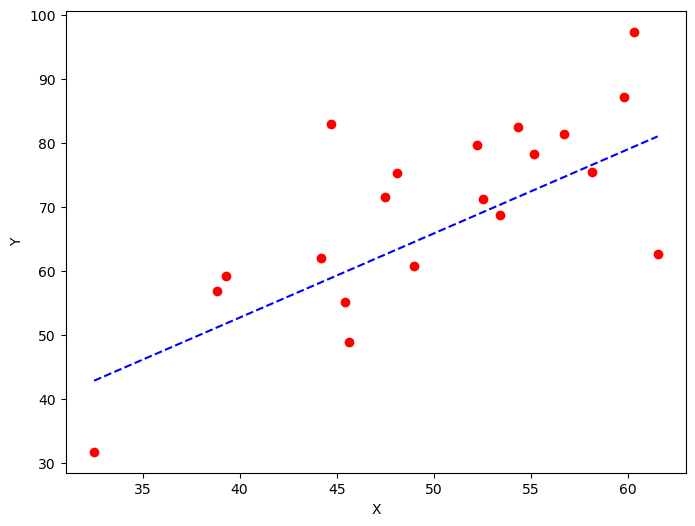

Iteration 5: Cost 112.49704004742098


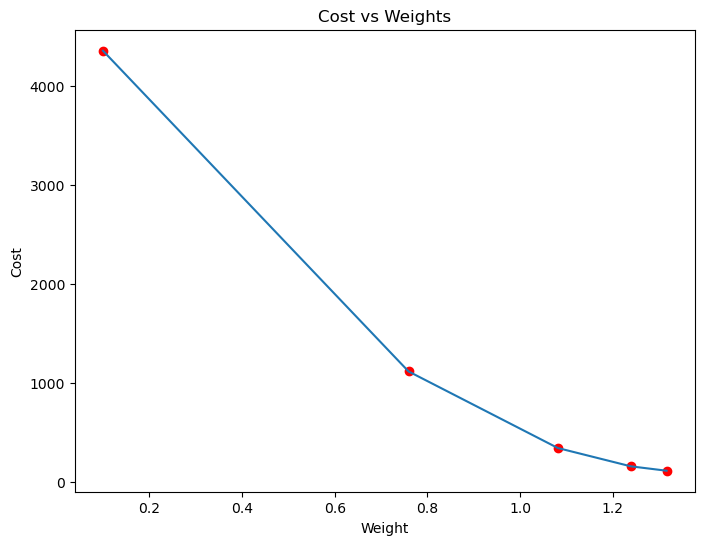

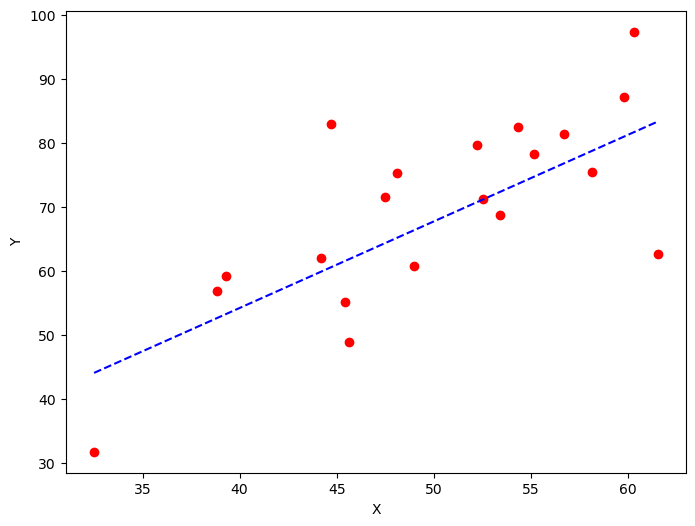

Iteration 6: Cost 101.9493925395456


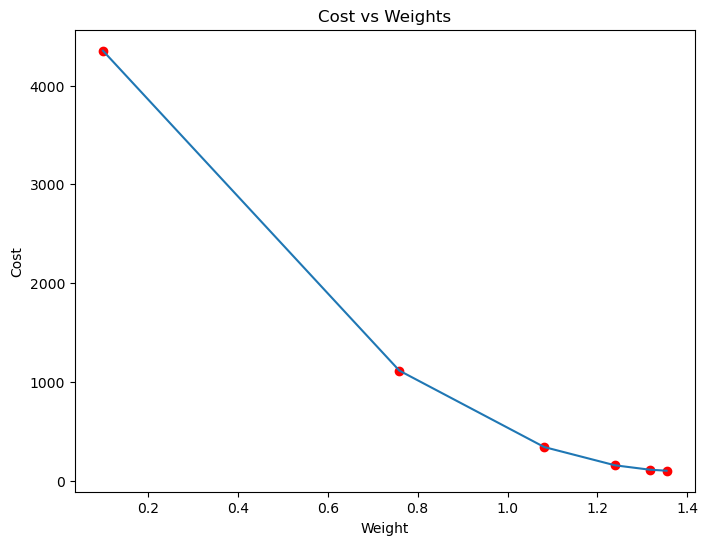

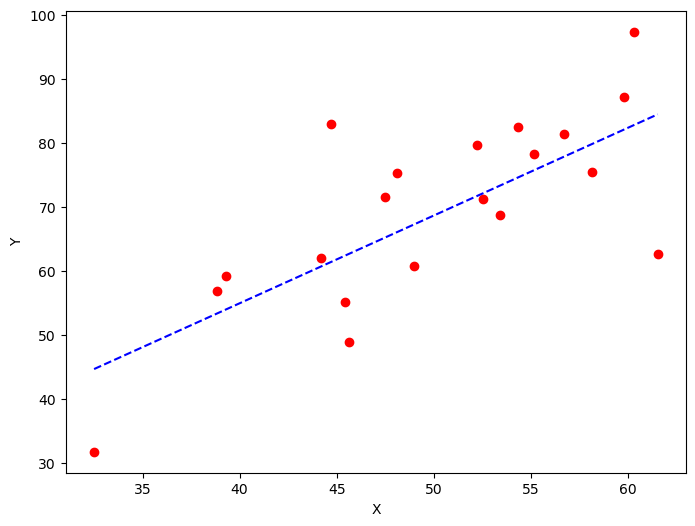

Iteration 7: Cost 99.4293893333546


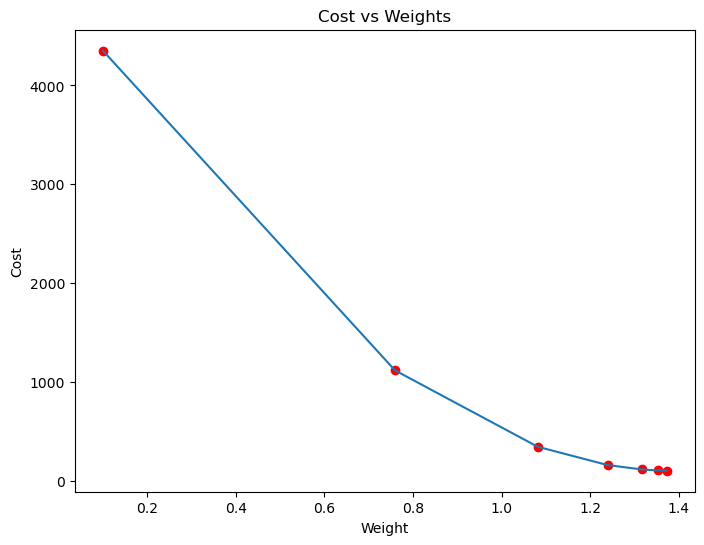

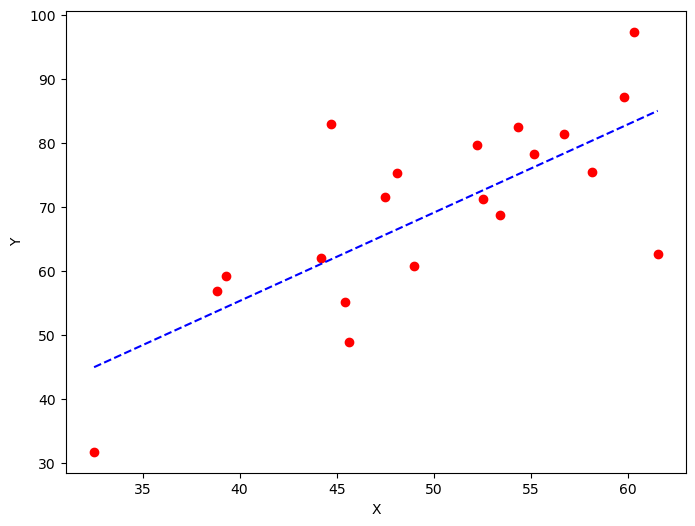

Iteration 8: Cost 98.82731958262897


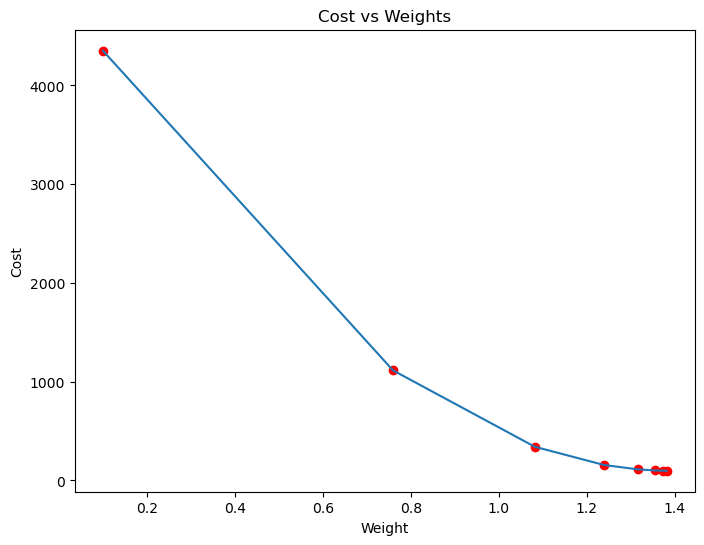

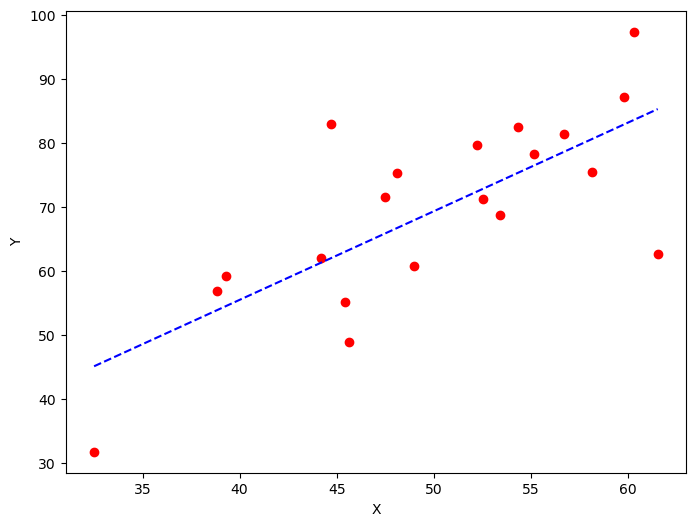

Iteration 9: Cost 98.68347500997261


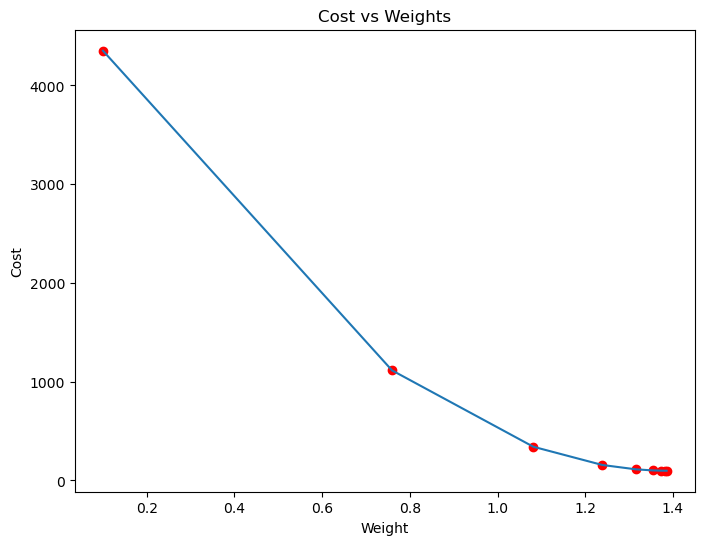

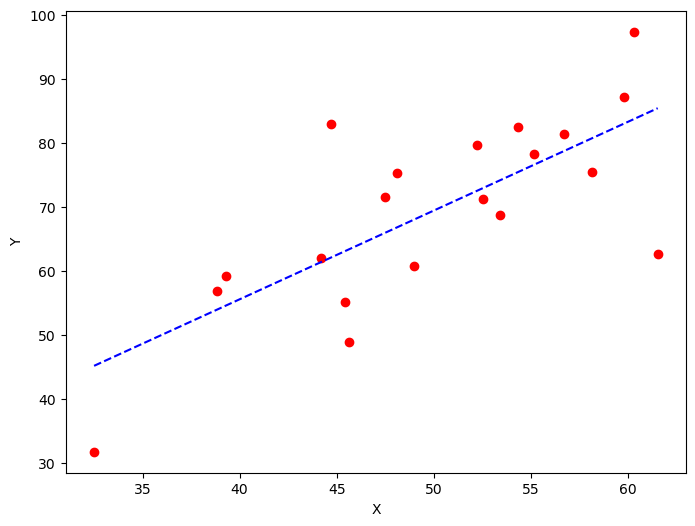

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def plot_gd(X,Y, iterations):
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations)
    Y_pred = estimated_weight*X + estimated_bias
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot(
        [min(X), max(X)],
        [min(Y_pred), max(Y_pred)],
        color='blue', markerfacecolor='red',
        markersize=10,linestyle='dashed'
    )
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    

for n in range(1, 10):
    plot_gd(x, y, n)